# Capstone Project: Exploratory Data Analysis - Inferential Statistics

### Learning Objectives:

- Identify variables in the data to answer to a project question.
- Identify strong correlations between pairs of independent variables or between an independent and a dependent variable. 
- Practice identifying the most appropriate tests to use to analyze relationships between variables.

In [110]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

df = pd.read_csv('labeled_schefter_tweets.csv')

df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df = df.set_index('Date')

df.head()

,Timestamp,DoW,Month,Day,Time,Year,Class,Tweet
Date,,,,,,,,
2010-01-01,Jan 01 2010 18:03:28,Fri,Jan,1,18:03:28,2010,I,John Clayton reports Josh McDaniels officially...
2010-01-01,Jan 01 2010 18:57:12,Fri,Jan,1,18:57:12,2010,I,PART 1: HC Josh McDaniels' said WR Brandon Mar...
2010-01-01,Jan 01 2010 18:58:33,Fri,Jan,1,18:58:33,2010,X,"PART II -- McDaniels: ""We're all accountable t..."
2010-01-01,Jan 01 2010 22:34:42,Fri,Jan,1,22:34:42,2010,T,Browns were awarded defensive lineman Titus Ad...
2010-01-01,Jan 01 2010 14:35:50,Fri,Jan,1,14:35:50,2010,X,Good morning Twitterverse and 2010. Some info ...


In [111]:
df.tail()

,Timestamp,DoW,Month,Day,Time,Year,Class,Tweet
Date,,,,,,,,
2019-04-17,Apr 17 2019 14:01:31,Wed,Apr,17,14:01:31,2019,X,Bengals will play the Los Angeles Rams on Sund...
2019-04-17,Apr 17 2019 11:50:39,Wed,Apr,17,11:50:39,2019,X,On the final day of visits for prospective dra...
2019-04-17,Apr 17 2019 00:09:38,Wed,Apr,17,00:09:38,2019,T,Bears’ TE Zach Miller officially is retiring n...
2019-04-17,Apr 17 2019 14:03:20,Wed,Apr,17,14:03:20,2019,X,"Monday Night Football, Monday Nov. 18:\n\nChie..."
2019-04-17,Apr 17 2019 14:07:36,Wed,Apr,17,14:07:36,2019,X,"Bears will face the Oakland Raiders on Sunday,..."


Text(0, 0.5, 'Frequency')

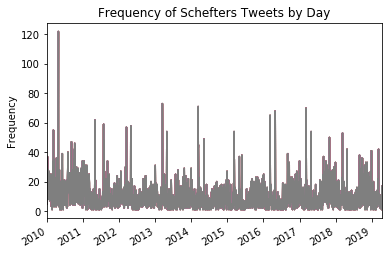

In [112]:
counts = df.groupby(['Date']).agg(len)
counts.plot(legend = False)
plt.title('Frequency of Schefters Tweets by Day')
plt.xlabel('')
plt.ylabel('Frequency')

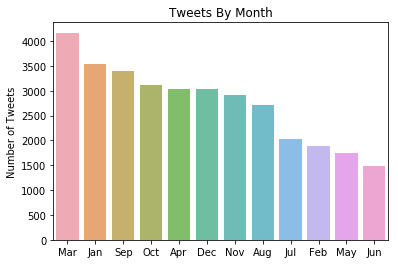

In [113]:
import seaborn as sns

bymonth = df['Month'].value_counts()
sns.barplot(bymonth.index, bymonth.values, alpha=0.8)
plt.title("Tweets By Month")
plt.ylabel("Number of Tweets")
plt.show()

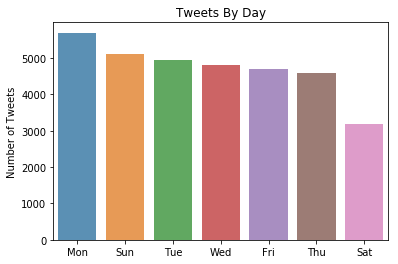

In [114]:
byday = df['DoW'].value_counts()
sns.barplot(byday.index, byday.values, alpha=0.8)
plt.title("Tweets By Day")
plt.ylabel("Number of Tweets")
plt.show()

My dataset is strictly derived from an individual Twitter account and contains only information regarding the text of tweets and the time each was published. However, I'm not initially interested in using any information regarding time since I only care whether an incoming tweet can be considered relevant or not based on its content. By relevant, I mean it fits my definition for an 'I' (injury-related) tweet or a 'T' (transactional) tweet. Therefore, the only variables I care about are the individual words or phrases that can help decide whether a tweet fits one of my two pre-defined categories.

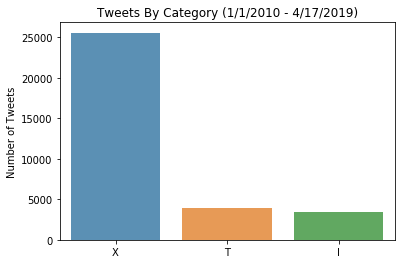

In [115]:
bycat = df['Class'].value_counts()

sns.barplot(bycat.index, bycat.values, alpha=0.8)
plt.title('Tweets By Category (1/1/2010 - 4/17/2019)')
plt.ylabel('Number of Tweets')
plt.show()

In [116]:
allfreq = df.Tweet.str.split(expand=True).stack().value_counts()

# view his most used words
allfreq.head(15)

to      15356
the     12046
and      9201
a        8596
in       7429
for      7192
on       6631
is       6243
of       5617
with     5006
RT       3940
will     3899
per      3705
his      3176
be       3112
dtype: int64

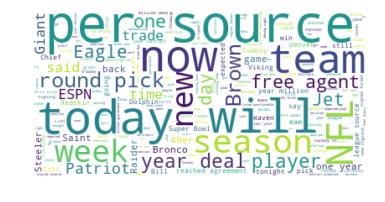

In [117]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(tweet for tweet in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(["https", "co", "RT"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [118]:
itweets = df['Class'] == 'I' # create Boolean list
itweets2 = df[itweets]
ifreq = itweets2.Tweet.str.split(expand=True).stack().value_counts()
ifreq.head(15)

to      1725
is      1301
a       1040
for     1013
will     947
and      911
WR       744
his      707
RB       689
per      673
play     621
the      570
with     547
out      540
as       536
dtype: int64

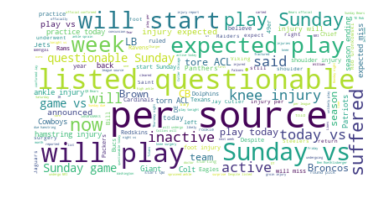

In [119]:
text = " ".join(tweet for tweet in itweets2.Tweet)

wordcloud = WordCloud(background_color="white", stopwords = stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [120]:
ttweets = df['Class'] == 'T' # create Boolean list
ttweets2 = df[ttweets]
tfreq = ttweets2.Tweet.str.split(expand=True).stack().value_counts()

tfreq.head(15)

to           1576
a            1440
and          1237
on           1142
signed       1058
the          1017
with         1003
per           818
former        699
for           653
have          622
WR            575
source.       540
released      518
agreement     514
dtype: int64

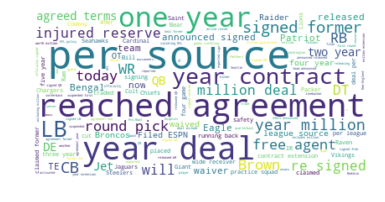

In [121]:
text = " ".join(tweet for tweet in ttweets2.Tweet)

wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Question to explore: How does an irrelevant tweet compare to a 'T' or 'I' tweet?

Text(0.5, 1.0, 'Average length of tweets by category')

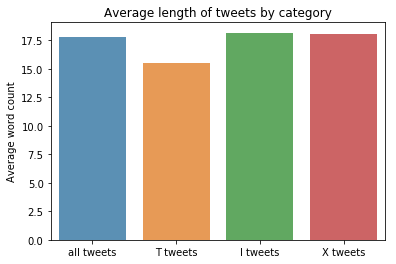

In [122]:
### average length of tweet (in words)

df['word_count'] = df['Tweet'].apply(lambda x: len(str(x).split(" ")))
ttweets2['word_count'] = ttweets2['Tweet'].apply(lambda x: len(str(x).split(" ")))
itweets2['word_count'] = itweets2['Tweet'].apply(lambda x: len(str(x).split(" ")))
xtweets = df['Class'] == 'X'
xtweets2 = df[xtweets]
xtweets2['word_count'] = xtweets2['Tweet'].apply(lambda x: len(str(x).split(" ")))

avg_len_all_word = df.word_count.mean()
avg_len_t_word = ttweets2.word_count.mean()
avg_len_i_word = itweets2.word_count.mean()
avg_len_x_word = xtweets2.word_count.mean()

sns.barplot(['all tweets', 'T tweets', 'I tweets', 'X tweets'],
           [avg_len_all_word, avg_len_t_word, avg_len_i_word, avg_len_x_word],
            alpha=0.8)
plt.ylabel('Average word count')
plt.title('Average length of tweets by category')

In [168]:
# statistical significance

import numpy as np
import scipy

bs_df_word_count = np.random.normal(df.word_count.mean(), df.word_count.std(), 10000)

z_avg_len_t_word = (ttweets2.word_count.mean() - bs_df_word_count.mean()) / bs_df_word_count.std()
z_avg_len_i_word = (itweets2.word_count.mean() - bs_df_word_count.mean()) / bs_df_word_count.std()
z_avg_len_x_word = (xtweets2.word_count.mean() - bs_df_word_count.mean()) / bs_df_word_count.std()

p_avg_len_t_word = scipy.stats.norm.sf(abs(z_avg_len_t_word))
p_avg_len_i_word = scipy.stats.norm.sf(abs(z_avg_len_i_word))
p_avg_len_x_word = scipy.stats.norm.sf(abs(z_avg_len_x_word))

Text(0.5, 1.0, 'Average length of tweets by category')

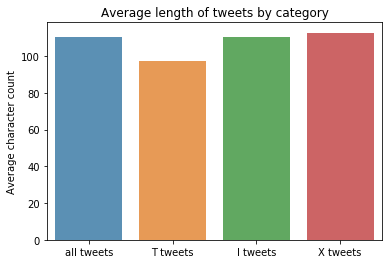

In [124]:
### average length of tweet in characters (including spaces)

df['char_count'] = df['Tweet'].str.len() # includes spaces
ttweets2['char_count'] = ttweets2['Tweet'].str.len()
itweets2['char_count'] = itweets2['Tweet'].str.len()
xtweets2['char_count'] = xtweets2['Tweet'].str.len()

avg_len_all_char = df.char_count.mean()
avg_len_t_char = ttweets2.char_count.mean()
avg_len_i_char = itweets2.char_count.mean()
avg_len_x_char = xtweets2.char_count.mean()

sns.barplot(['all tweets', 'T tweets', 'I tweets', 'X tweets'],
           [avg_len_all_char, avg_len_t_char, avg_len_i_char, avg_len_x_char],
            alpha=0.8)
plt.ylabel('Average character count')
plt.title('Average length of tweets by category')

In [173]:
# statistical significance

import numpy as np
import scipy

bs_df_char_count = np.random.normal(df.char_count.mean(), df.char_count.std(), 10000)

z_avg_len_t_char = (ttweets2.char_count.mean() - bs_df_char_count.mean()) / bs_df_char_count.std()
z_avg_len_i_char = (itweets2.char_count.mean() - bs_df_char_count.mean()) / bs_df_char_count.std()
z_avg_len_x_char = (xtweets2.char_count.mean() - bs_df_char_count.mean()) / bs_df_char_count.std()

p_avg_len_t_char = scipy.stats.norm.sf(abs(z_avg_len_t_char))
p_avg_len_i_char = scipy.stats.norm.sf(abs(z_avg_len_i_char))
p_avg_len_x_char = scipy.stats.norm.sf(abs(z_avg_len_x_char))

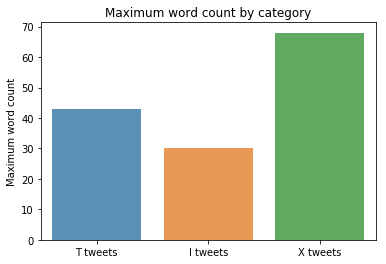

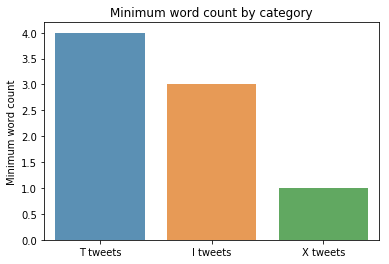

In [174]:
### Maximum and minimum word length

max_word_count_t = ttweets2.word_count.max()
min_word_count_t = ttweets2.word_count.min()
max_word_count_i = itweets2.word_count.max()
min_word_count_i = itweets2.word_count.min()
max_word_count_x = xtweets2.word_count.max()
min_word_count_x = xtweets2.word_count.min()

sns.barplot([ 'T tweets', 'I tweets', 'X tweets'],
           [max_word_count_t, max_word_count_i, max_word_count_x],
            alpha=0.8)
plt.ylabel('Maximum word count')
plt.title('Maximum word count by category')
plt.show()

sns.barplot([ 'T tweets', 'I tweets', 'X tweets'],
           [min_word_count_t, min_word_count_i, min_word_count_x],
            alpha=0.8)
plt.ylabel('Minimum word count')
plt.title('Minimum word count by category')
plt.show


#statistical significance

z_max_len_t_word = (ttweets2.word_count.max() - bs_df_word_count.max()) / bs_df_word_count.std()
z_min_len_t_word = (ttweets2.word_count.min() - bs_df_word_count.min()) / bs_df_word_count.std()
z_max_len_i_word = (itweets2.word_count.max() - bs_df_word_count.max()) / bs_df_word_count.std()
z_min_len_i_word = (itweets2.word_count.min() - bs_df_word_count.min()) / bs_df_word_count.std()
z_max_len_x_word = (xtweets2.word_count.max() - bs_df_word_count.max()) / bs_df_word_count.std()
z_min_len_x_word = (xtweets2.word_count.min() - bs_df_word_count.min()) / bs_df_word_count.std()


p_max_len_t_word = scipy.stats.norm.sf(abs(z_max_len_t_word))
p_min_len_t_word = scipy.stats.norm.sf(abs(z_min_len_t_word))
p_max_len_i_word = scipy.stats.norm.sf(abs(z_max_len_i_word))
p_min_len_i_word = scipy.stats.norm.sf(abs(z_min_len_i_word))
p_max_len_x_word = scipy.stats.norm.sf(abs(z_max_len_x_word))
p_min_len_x_word = scipy.stats.norm.sf(abs(z_min_len_x_word))

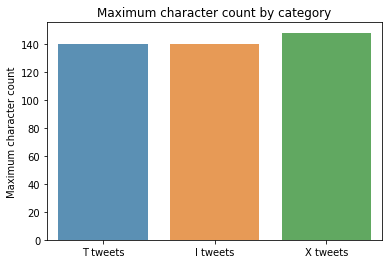

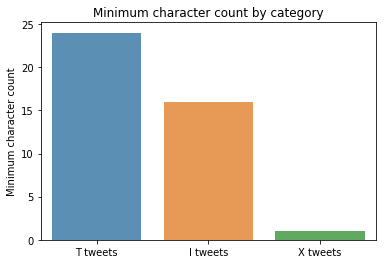

In [176]:
### Maximum and minimum character counts

max_char_counts_t = ttweets2.char_count.max()
min_char_counts_t = ttweets2.char_count.min()
max_char_counts_i = itweets2.char_count.max()
min_char_counts_i = itweets2.char_count.min()
max_char_counts_x = xtweets2.char_count.max()
min_char_counts_x = xtweets2.char_count.min()

sns.barplot([ 'T tweets', 'I tweets', 'X tweets'],
           [max_char_counts_t, max_char_counts_i, max_char_counts_x],
            alpha=0.8)
plt.ylabel('Maximum character count')
plt.title('Maximum character count by category')
plt.show()

sns.barplot([ 'T tweets', 'I tweets', 'X tweets'],
           [min_char_counts_t, min_char_counts_i, min_char_counts_x],
            alpha=0.8)
plt.ylabel('Minimum character count')
plt.title('Minimum character count by category')
plt.show

#statistical significance

z_max_len_t_char = (ttweets2.char_count.max() - bs_df_char_count.max()) / bs_df_char_count.std()
z_min_len_t_char = (ttweets2.char_count.min() - bs_df_char_count.min()) / bs_df_char_count.std()
z_max_len_i_char = (itweets2.char_count.max() - bs_df_char_count.max()) / bs_df_char_count.std()
z_min_len_i_char = (itweets2.char_count.min() - bs_df_char_count.min()) / bs_df_char_count.std()
z_max_len_x_char = (xtweets2.char_count.max() - bs_df_char_count.max()) / bs_df_char_count.std()
z_min_len_x_char = (xtweets2.char_count.min() - bs_df_char_count.min()) / bs_df_char_count.std()


p_max_len_t_char = scipy.stats.norm.sf(abs(z_max_len_t_char))
p_min_len_t_char = scipy.stats.norm.sf(abs(z_min_len_t_char))
p_max_len_i_char = scipy.stats.norm.sf(abs(z_max_len_i_char))
p_min_len_i_char = scipy.stats.norm.sf(abs(z_min_len_i_char))
p_max_len_x_char = scipy.stats.norm.sf(abs(z_max_len_x_char))
p_min_len_x_char = scipy.stats.norm.sf(abs(z_min_len_x_char))

In [18]:
# Average number of stopwords
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

df['stopwords'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
ttweets2['stopwords'] = ttweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
itweets2['stopwords'] = itweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
xtweets2['stopwords'] = xtweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

avg_stopwords_all = df[['Tweet','stopwords']].mean()
avg_stopwords_t = ttweets2[['Tweet','stopwords']].mean()
avg_stopwords_i = itweets2[['Tweet','stopwords']].mean()
avg_stopwords_x = xtweets2[['Tweet','stopwords']].mean()

[nltk_data] Downloading package stopwords to /Users/lel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


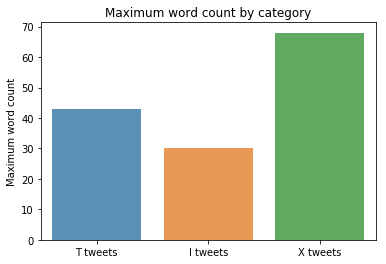

<function matplotlib.pyplot.show(*args, **kw)>

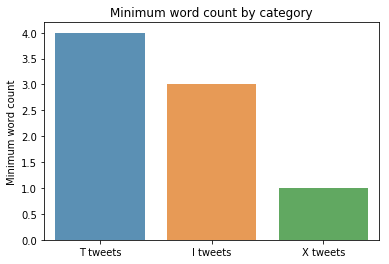

In [84]:
sns.barplot([ 'T tweets', 'I tweets', 'X tweets'],
           [max_word_count_t, max_word_count_i, max_word_count_x],
            alpha=0.8)
plt.ylabel('Maximum word count')
plt.title('Maximum word count by category')
plt.show()

sns.barplot([ 'T tweets', 'I tweets', 'X tweets'],
           [min_word_count_t, min_word_count_i, min_word_count_x],
            alpha=0.8)
plt.ylabel('Minimum word count')
plt.title('Minimum word count by category')
plt.show

In [178]:
## Average frequency of hashtags

df['hashtags'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
ttweets2['hashtags'] = ttweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
itweets2['hashtags'] = itweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
xtweets2['hashtags'] = xtweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

avg_hashtag_t = ttweets2[['Tweet','hashtags']].mean()
avg_hashtag_i = itweets2[['Tweet','hashtags']].mean()
avg_hashtag_x = xtweets2[['Tweet','hashtags']].mean()

#statistical significance

bs_hashtag_count = np.random.normal(df.hashtags.mean(), df.hashtags.std(), 10000)

z_avg_hashtags_t = (ttweets2.hashtags.mean() - bs_hashtag_count.mean()) / bs_hashtag_count.std()
z_avg_hashtags_i = (itweets2.hashtags.mean() - bs_hashtag_count.mean()) / bs_hashtag_count.std()
z_avg_hashtags_x = (xtweets2.hashtags.mean() - bs_hashtag_count.mean()) / bs_hashtag_count.std()

print(p_avg_hashtags_t = scipy.stats.norm.sf(abs(z_avg_hashtags_t)))
print(p_avg_hashtags_i = scipy.stats.norm.sf(abs(z_avg_hashtags_i)))
print(p_avg_hashtags_x = scipy.stats.norm.sf(abs(z_avg_hashtags_x)))

TypeError: 'p_avg_hashtags_t' is an invalid keyword argument for print()

Text(0.5, 1.0, 'Frequency of hashtags by category')

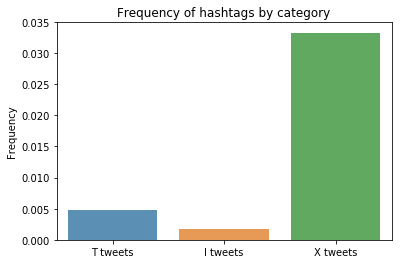

In [90]:
sns.barplot(['T tweets', 'I tweets', 'X tweets'],
           [avg_hashtag_t, avg_hashtag_i, avg_hashtag_x],
            alpha=0.8)
plt.ylabel('Frequency')
plt.title('Frequency of hashtags by category')

In [45]:
## Average frequency of @ symbols

df['at'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
ttweets2['at'] = ttweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
itweets2['at'] = itweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
xtweets2['at'] = xtweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))

avg_at_all = df[['Tweet','at']].mean()
avg_at_t = ttweets2[['Tweet','at']].mean()
avg_at_i = itweets2[['Tweet','at']].mean()
avg_at_x = xtweets2[['Tweet','at']].mean()

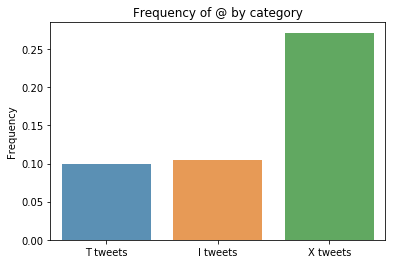

In [91]:
sns.barplot([ 'T tweets', 'I tweets', 'X tweets'],
           [avg_at_t, avg_at_i, avg_at_x],
            alpha=0.8)
plt.ylabel('Frequency')
plt.title('Frequency of @ by category')
plt.show()

In [ ]:
['', round(avg_at_t,4), '@ sign']
['Special chars in I tweets:', round(avg_hashtag_i,4), 'hashtags'],
    ['', round(avg_at_i,4), '@ sign'],
    ['Special chars in X tweets:', round(avg_hashtag_x,4), 'hashtags'],
    ['', round(avg_at_x,4), '@ sign']

In [179]:
nestedList = [
    ['Category', '', '', 'p-value'],
    ['Average length of all tweets:', round(avg_len_all_word,2), 'words', ''],
    ['', round(avg_len_all_char,2), 'characters', ''],
    ['Average length of T tweets:', round(avg_len_t_word,2), 'words', round(p_avg_len_t_word,2)], 
    ['', round(avg_len_t_char,2), 'characters', round(p_avg_len_t_char,2)],
    ['Average length of I tweets:', round(avg_len_i_word,2), 'words', round(p_avg_len_i_word,2)],
    ['', round(avg_len_i_char,2), 'characters', round(p_avg_len_t_char,2)],
    ['Average length of X tweets:', round(avg_len_x_word,2), 'words', round(p_avg_len_x_word,2)],
    ['', round(avg_len_x_char,2), 'characters', round(p_avg_len_t_char,2)],
    ['Maximum length of T tweets:', round(max_word_count_t,2), 'words', round(p_max_len_t_word,2)],
    ['', round(max_char_counts_t,2), 'characters', round(p_max_len_t_char,2)],
    ['Minimum length of T tweets:', round(min_word_count_t,2), 'words', round(p_min_len_t_word,2)],
    ['', round(min_char_counts_t,2), 'characters', round(p_min_len_t_char,2)],
    ['Maximum length of I tweets:', round(max_word_count_i,2), 'words', round(p_max_len_i_word,2)],
    ['', round(max_char_counts_i,2), 'characters', round(p_max_len_i_char,2)],
    ['Minimum length of T tweets:', round(min_word_count_t,2), 'words', round(p_min_len_i_word,2)],
    ['', round(min_char_counts_i,2), 'characters', round(p_min_len_i_char,2)],
    ['Maximum length of X tweets:', round(max_word_count_x,2), 'words', round(p_max_len_x_word,2)],
    ['', round(max_char_counts_x,2), 'characters', round(p_max_len_x_char,2)],
    ['Minimum length of X tweets:', round(min_word_count_x,2), 'word', round(p_min_len_x_word,2)],
    ['', round(min_char_counts_x,2), 'character', round(p_min_len_x_char,2)]
]

for item in nestedList:
    print('|', item[0], ' '*(30-len(item[0])), '|',
         item[1], ' '*(10-len(str(item[1])) ),
         item[2], ' '*(10-len(item[2])), '|',
         item[3], ' '*(10-len(str(item[3])) ),
         )

| Category                        |                         | p-value    
| Average length of all tweets:   | 17.79       words       |            
|                                 | 110.65      characters  |            
| Average length of T tweets:     | 15.51       words       | 0.34       
|                                 | 97.39       characters  | 0.33       
| Average length of I tweets:     | 18.18       words       | 0.48       
|                                 | 110.22      characters  | 0.33       
| Average length of X tweets:     | 18.09       words       | 0.48       
|                                 | 112.77      characters  | 0.33       
| Maximum length of T tweets:     | 43          words       | 0.22       
|                                 | 140         characters  | 0.01       
| Minimum length of T tweets:     | 4           words       | 0.08       
|                                 | 24          characters  | 0.27       
| Maximum length of I tweets:     | 30

## Answer: How does an irrelevant tweet compare to a 'T' or 'I' tweet?

After getting a sense for which words are most characteristic of each class of Tweet, we next looked at the makeup of each class independent of the underlying words. A few observations can be made:


1. 'T' tweets (15.51 words, 97.39 characters) tend to be significantly shorter than any 'I' (18.18, 110.22) and X (18.09, 112.77). 

2. All relevant tweets ('T' and 'I') have at least three words but can still take up the entire 140-character max that Twitter allows.

3. The presence of a hashtag is 2.5 times more likely in 'X' tweets than either 'I' or 'T' tweets. Likewise, the presence of an @ sign is 7 times more likely.